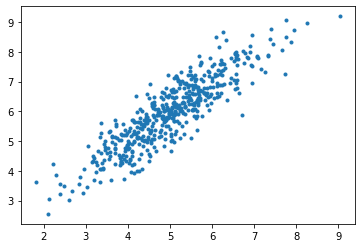

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# creating data 
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 
  
# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 

In [3]:
data = np.hstack((np.ones((data.shape[0], 1)), data)) 

print(data)

split_factor = 0.90
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1]
print(X_train)
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 
  
print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0]))

[[1.         5.61139754 7.06901067]
 [1.         4.5142182  5.28500586]
 [1.         4.3075978  5.58461284]
 ...
 [1.         4.05675675 5.29982549]
 [1.         4.76554278 5.02478887]
 [1.         6.78242657 7.89868966]]
[[1.         5.61139754]
 [1.         4.5142182 ]
 [1.         4.3075978 ]
 ...
 [1.         4.29683735]
 [1.         4.70274403]
 [1.         4.94479951]]
Number of examples in training set =  7200
Number of examples in testing set =  800


In [25]:
def hypothesis(X, theta):
    """
    进行预测
    """
    print(np.dot(X, theta))
    
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta):
    """
    计算梯度
    """
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta):
    """
    计算错误率
    """
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size):
    """
    创建小批处理
    """
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
        if data.shape[0] % batch_size != 0: 
            mini_batch = data[i * batch_size:data.shape[0]] 
            X_mini = mini_batch[:, :-1] 
            Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
            mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32):
    """
    梯度下降算法
    """
    theta = np.zeros((X.shape[1], 1))
    
    print(theta)
    
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

[[0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[4.0505203 ]
 [5.40586889]
 [4.43217009]
 [4.24072207]
 [5.5323752 ]
 [4.35392028]
 [4.07084132]
 [2.9086647 ]
 [3.71383479]
 [5.89580332]
 [4.04469647]
 [4.04077751]
 [4.55628551]
 [4.15203007]
 [4.26256987]
 [6.64155941]
 [3.69061934]
 [5.47759436]
 [3.92757087]
 [5.39987656]
 [6.63560283]
 [4.03106092]
 [4.48941577]
 [5.39714378]
 [3.61294767]
 [3.71400186]
 [4.85585216]
 [4.98835767]
 [5.01044606]
 [6.2715543 ]
 [5.3169436 ]
 [4.93907381]]
[[4.0505203 ]
 [5.40586889]
 [4.43217009]
 [4.24072207]
 [5.5323752 ]
 [4.35392028]
 [4.07084132]
 [2.9086647 ]
 [3.71383479]
 [5.89580332]
 [4.04469647

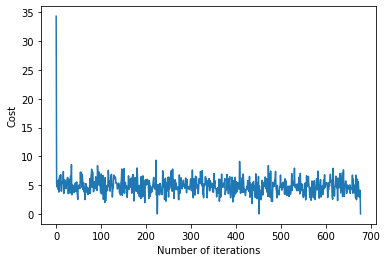

In [20]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

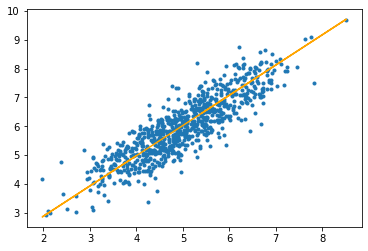

Mean absolute error =  0.5935180942582574
Mean Squared error =  0.5935180942582574


In [15]:
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error1 = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
error2 = np.sum(np.square(y_test - y_pred) / y_test.shape[0]) * 2

print("Mean absolute error = ", error)
print("Mean Squared error = ", error2) 